#2. Implement and train Y-network for cifar 10 dataset

In order to examine them better, at this part I only used cifar10 dataset and answered q2,q3,q4 with that dataset. At the end of q4, there is another section where cifar100 dataset is examined.

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
import tensorflow as tf



170498071/170498071 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


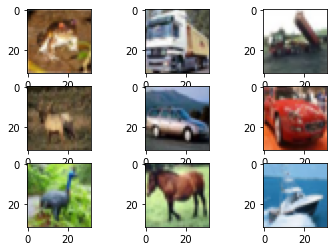

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Reshape the array to be a 2D array with a single column
testy_2d = testy.reshape(-1, 1)
trainy_2d = trainy.reshape(-1, 1)
# Fit the encoder to the data and transform the data
testy = encoder.fit_transform(testy_2d).toarray()
trainy = encoder.fit_transform(trainy_2d).toarray()

# Print the encoded data
print(testy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
testy.shape

(10000, 10)

In [ ]:
# first CNN module
classifier_left = Sequential()

#left 3-layered CNN
classifier_left.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
classifier_left.add(Dropout(0.25))
classifier_left.add(MaxPooling2D(pool_size =(2,2)))

classifier_left.add(Conv2D(64,(3,3)))
classifier_left.add(Activation('relu'))
classifier_left.add(Dropout(0.25))
classifier_left.add(MaxPooling2D(pool_size =(2,2)))

classifier_left.add(Conv2D(128,(3,3)))
classifier_left.add(Activation('relu'))
classifier_left.add(Dropout(0.25))
classifier_left.add(MaxPooling2D(pool_size =(2,2)))


In [ ]:
classifier_left.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 activation (Activation)     (None, 13, 13, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                      

In [ ]:
# second CNN module
classifier_right = Sequential()

#left 3-layered CNN
classifier_right.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
classifier_right.add(Dropout(0.25))
classifier_right.add(MaxPooling2D(pool_size =(2,2)))

classifier_right.add(Conv2D(64,(3,3)))
classifier_right.add(Activation('relu'))
classifier_right.add(Dropout(0.25))
classifier_right.add(MaxPooling2D(pool_size =(2,2)))

classifier_right.add(Conv2D(128,(3,3)))
classifier_right.add(Activation('relu'))
classifier_right.add(Dropout(0.25))
classifier_right.add(MaxPooling2D(pool_size =(2,2)))

In [ ]:
classifier_right.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 activation_2 (Activation)   (None, 13, 13, 64)        0         
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 64)        0         
                                                      

In [ ]:
def fully_con_layer(input_dense):
  # Create a placeholder for the input data
  input_shape = input_dense.shape[1:]

  input_data = tf.keras.Input(shape=input_shape)
  # Pass the input data through each CNN module
  output_left = classifier_left(input_data)
  output_right = classifier_right(input_data)

  # Concatenate the two outputs along the channel axis
  concatenated_output = tf.keras.layers.concatenate([output_left, output_right], axis=-1)

  # Flatten the concatenated output
  flattened_output = tf.keras.layers.Flatten()(concatenated_output)

  # Pass the flattened output through a fully connected layer
  fully_connected_output = tf.keras.layers.Dense(units=10, activation='softmax')(flattened_output)
  #  Define the full model

  model = tf.keras.Model(inputs=input_data, outputs=fully_connected_output)
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model = fully_con_layer(trainX)
# Train the model on your training data
model.fit(trainX, trainy, batch_size=100, epochs=10, validation_data=(testX, testy))

In [ ]:
model.summary()

Model: "model_55"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_148 (InputLayer)         [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 sequential_293 (Sequential)    (None, 2, 2, 128)    93248       ['input_148[0][0]']              
                                                                                                  
 sequential_294 (Sequential)    (None, 2, 2, 128)    93248       ['input_148[0][0]']              
                                                                                                  
 concatenate_50 (Concatenate)   (None, 2, 2, 256)    0           ['sequential_293[0][0]',         
                                                                  'sequential_294[0][0]']  

In [ ]:
# evaluate your model on test set
test_loss, test_accuracy = model.evaluate(testX, testy)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 9s 27ms/step - loss: 0.8396 - accuracy: 0.7322
Test accuracy: 0.732200026512146


In [ ]:
#plot the train and test accuracies
train_ac = [0.4002, 0.5514, 0.6130, 0.6541, 0.6803, 0.7036, 0.7224, 0.7407, 0.7549, 0.7683]
val_ac = [0.5299, 0.6003, 0.6236, 0.6613, 0.6422, 0.6652,  0.7057, 0.7136,  0.6948, 0.7322]
epoch = [1,2,3,4,5,6,7,8,9,10]
plt.plot(epoch, train_ac, label='Training Accuracy')
plt.plot(epoch, val_ac, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

In [ ]:
#save the trained model
model.save('3_layer_cnn_model_1.h5')


In [ ]:
#same model with 20 epoch
model1 = fully_con_layer(trainX)
# Train the model on your training data
model1.fit(trainX, trainy, batch_size=100, epochs=20, validation_data=(testX, testy))

Epoch 1/20
500/500 [==============================] - 198s 394ms/step - loss: 0.9713 - accuracy: 0.6621 - val_loss: 0.9947 - val_accuracy: 0.6878
Epoch 2/20
500/500 [==============================] - 199s 398ms/step - loss: 0.7305 - accuracy: 0.7476 - val_loss: 0.8907 - val_accuracy: 0.7169
Epoch 3/20
500/500 [==============================] - 198s 396ms/step - loss: 0.6573 - accuracy: 0.7730 - val_loss: 0.8335 - val_accuracy: 0.7402
Epoch 4/20
500/500 [==============================] - 198s 395ms/step - loss: 0.6134 - accuracy: 0.7891 - val_loss: 0.8354 - val_accuracy: 0.7276
Epoch 5/20
500/500 [==============================] - 198s 396ms/step - loss: 0.5813 - accuracy: 0.7990 - val_loss: 0.7780 - val_accuracy: 0.7442
Epoch 6/20
500/500 [==============================] - 199s 399ms/step - loss: 0.5514 - accuracy: 0.8083 - val_loss: 0.7447 - val_accuracy: 0.7607
Epoch 7/20
500/500 [==============================] - 198s 396ms/step - loss: 0.5245 - accuracy: 0.8174 - val_loss: 0.7460 -

In [ ]:
# examine  the  overfitting  problem  by  plotting  model  accuracies  on  training
#and  validation  data
model1.save('model_1.h5')


#3. Optimize Y-network, experiment with different hyperparameteres

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPool2D, concatenate, Flatten, Dense
from tensorflow.keras.models import Model
# the model described in one function
def create_cnn_model(num_filters):
    input_tensor = Input(shape=(32,32,3))

    # Left CNN model
    left_conv1 = Conv2D(num_filters, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(input_tensor)
    left_dropout1 = Dropout(0.25)(left_conv1)
    left_maxpool1 = MaxPool2D(pool_size=(2,2))(left_dropout1)

    left_conv2 = Conv2D(num_filters, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(left_maxpool1)
    left_dropout2 = Dropout(0.25)(left_conv2)
    left_maxpool2 = MaxPool2D(pool_size=(2,2))(left_dropout2)

    left_conv3 = Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(left_maxpool2)
    left_dropout3 = Dropout(0.25)(left_conv3)
    left_maxpool3 = MaxPool2D(pool_size=(2,2))(left_dropout3)
    left_flatten = Flatten()(left_maxpool3)
    left_model = Model(inputs=input_tensor, outputs=left_flatten)

    # Right CNN model
    right_conv1 = Conv2D(num_filters, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(input_tensor)
    right_dropout1 = Dropout(0.25)(right_conv1)
    right_maxpool1 = MaxPool2D(pool_size=(2,2))(right_dropout1)

    right_conv2 = Conv2D(num_filters, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(right_maxpool1)
    right_dropout2 = Dropout(0.25)(right_conv2)
    right_maxpool2 = MaxPool2D(pool_size=(2,2))(right_dropout2)

    right_conv3 = Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(right_maxpool2)
    right_dropout3 = Dropout(0.25)(right_conv3)
    right_maxpool3 = MaxPool2D(pool_size=(2,2))(right_dropout3)
    right_flatten = Flatten()(right_maxpool3)
    right_model = Model(inputs=input_tensor, outputs=right_flatten)

    # Concatenate left and right models
    concat = concatenate([left_flatten, right_flatten])

    # Output layer
    output_layer = Dense(10, activation='softmax')(concat)

    # Y network model
    y_model = Model(inputs=input_tensor, outputs=output_layer)

    # Compile the model
    y_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return y_model





In [ ]:
# Define the range of values to search over
param_grid = {
    'num_filters': [32, 64, 128],
}

# Create the Keras model for use in scikit-learn
model2 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)

<ipython-input-21-1d824f905309>:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(trainX, trainy)

# Print the best parameters and accuracy score
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

KeyboardInterrupt: ignored

#4: Visualize Feature Maps

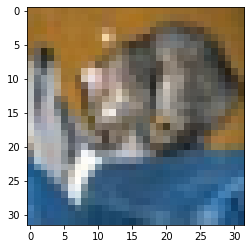

In [ ]:
# feature map visualization

#show first picture in test dataset
import matplotlib.pyplot as plt
testX[0].shape
plt.imshow(testX[0])


In [ ]:
model = create_cnn_model(num_filters=32)

In [ ]:
from matplotlib import pyplot as plt
from keras.models import Model

#shape(32,32,3) is expanded to (1,32,32,3)
img_array = np.expand_dims(testX[0], axis=0)
# output of the first convolutional layer(left branch)
new_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
new_model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 54ms/step


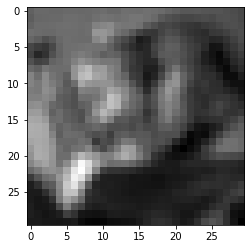

In [ ]:
#visualize the first filter
feature_maps = new_model.predict(img_array)


plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
feature_maps.shape

(1, 30, 30, 32)

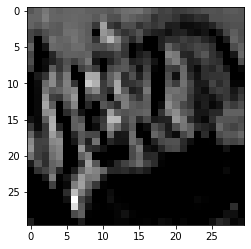

In [ ]:
#visualize the third filter

plt.imshow(feature_maps[0, :, :, 3], cmap='gray')
plt.show()

In [ ]:
# output of the first convolutional layer(right branch)

new_model = Model(inputs=model.inputs, outputs=model.layers[2].output)

new_model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 51ms/step


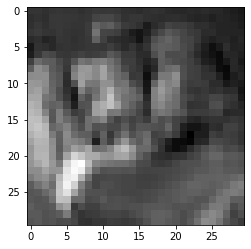

In [ ]:
#visualize the first filter

feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

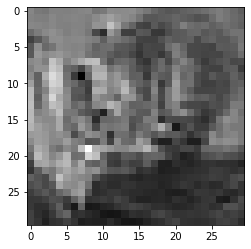

In [ ]:
#visualize the tenth filter

plt.imshow(feature_maps[0, :, :, 10], cmap='gray')
plt.show()

In [ ]:
# output of the first maxpooling layer(left branch)

new_model = Model(inputs=model.inputs, outputs=model.layers[5].output)

new_model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_36 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 72ms/step


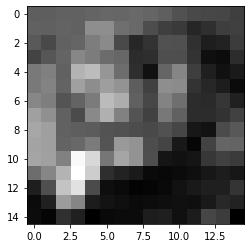

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
#output of the second convolutional layer(left branch)
new_model = Model(inputs=model.inputs, outputs=model.layers[7].output)

new_model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_36 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
______________________________________________________

1/1 [==============================] - 0s 65ms/step


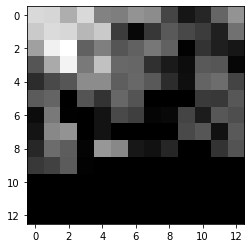

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

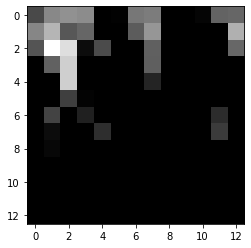

In [ ]:
plt.imshow(feature_maps[0, :, :, 5], cmap='gray')
plt.show()

In [ ]:
new_model = Model(inputs=model.inputs, outputs=model.layers[8].output)

new_model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_39 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
______________________________________________________

1/1 [==============================] - 0s 61ms/step


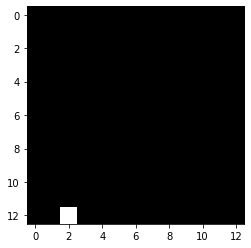

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
new_model = Model(inputs=model.inputs, outputs=model.layers[13].output)

new_model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_36 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 dropout_37 (Dropout)        (None, 13, 13, 32)        0         
                                                          

1/1 [==============================] - 0s 87ms/step


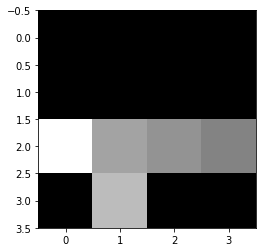

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
new_model = Model(inputs=model.inputs, outputs=model.layers[14].output)

new_model.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_39 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 dropout_40 (Dropout)        (None, 13, 13, 32)        0         
                                                          

1/1 [==============================] - 0s 59ms/step


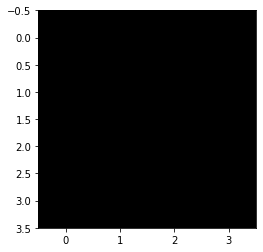

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

#Q2 for cifar100 dataset

2. Implement Y-network for cifar100

In [ ]:
from keras.datasets import cifar100


169001437/169001437 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


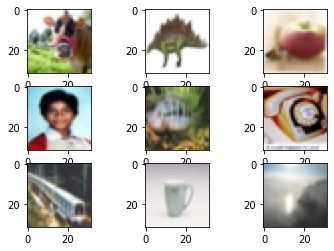

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar100.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Reshape the array to be a 2D array with a single column
testy_2d = testy.reshape(-1, 1)
trainy_2d = trainy.reshape(-1, 1)
# Fit the encoder to the data and transform the data
testy = encoder.fit_transform(testy_2d).toarray()
trainy = encoder.fit_transform(trainy_2d).toarray()

# Print the encoded data
print(testy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(trainX.shape)
print(testX.shape)
print(trainy.shape)
print(testy.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


In [ ]:
# first CNN module
classifier_left = Sequential()

#left 3-layered CNN
classifier_left.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
classifier_left.add(Dropout(0.25))
classifier_left.add(MaxPooling2D(pool_size =(2,2)))

classifier_left.add(Conv2D(64,(3,3)))
classifier_left.add(Activation('relu'))
classifier_left.add(Dropout(0.25))
classifier_left.add(MaxPooling2D(pool_size =(2,2)))

classifier_left.add(Conv2D(128,(3,3)))
classifier_left.add(Activation('relu'))
classifier_left.add(Dropout(0.25))
classifier_left.add(MaxPooling2D(pool_size =(2,2)))


In [ ]:
# second CNN module
classifier_right = Sequential()

#left 3-layered CNN
classifier_right.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
classifier_right.add(Dropout(0.25))
classifier_right.add(MaxPooling2D(pool_size =(2,2)))

classifier_right.add(Conv2D(64,(3,3)))
classifier_right.add(Activation('relu'))
classifier_right.add(Dropout(0.25))
classifier_right.add(MaxPooling2D(pool_size =(2,2)))

classifier_right.add(Conv2D(128,(3,3)))
classifier_right.add(Activation('relu'))
classifier_right.add(Dropout(0.25))
classifier_right.add(MaxPooling2D(pool_size =(2,2)))

In [ ]:
def fully_con_layer(input_dense):
  # Create a placeholder for the input data
  input_shape = input_dense.shape[1:]

  input_data = tf.keras.Input(shape=input_shape)
  # Pass the input data through each CNN module
  output_left = classifier_left(input_data)
  output_right = classifier_right(input_data)

  # Concatenate the two outputs along the channel axis
  concatenated_output = tf.keras.layers.concatenate([output_left, output_right], axis=-1)

  # Flatten the concatenated output
  flattened_output = tf.keras.layers.Flatten()(concatenated_output)

  # Pass the flattened output through a fully connected layer
  fully_connected_output = tf.keras.layers.Dense(units=100, activation='softmax')(flattened_output)
  #  Define the full model

  model = tf.keras.Model(inputs=input_data, outputs=fully_connected_output)
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model = fully_con_layer(trainX)
# Train the model on your training data
model.fit(trainX, trainy, batch_size=100, epochs=10, validation_data=(testX, testy))

Epoch 1/10
500/500 [==============================] - 226s 449ms/step - loss: 3.8367 - accuracy: 0.1243 - val_loss: 3.6347 - val_accuracy: 0.2078
Epoch 2/10
500/500 [==============================] - 241s 481ms/step - loss: 3.1601 - accuracy: 0.2398 - val_loss: 3.2860 - val_accuracy: 0.2720
Epoch 3/10
500/500 [==============================] - 206s 412ms/step - loss: 2.8429 - accuracy: 0.3025 - val_loss: 3.1264 - val_accuracy: 0.2911
Epoch 4/10
500/500 [==============================] - 222s 443ms/step - loss: 2.6085 - accuracy: 0.3495 - val_loss: 2.8502 - val_accuracy: 0.3446
Epoch 5/10
500/500 [==============================] - 213s 425ms/step - loss: 2.4380 - accuracy: 0.3868 - val_loss: 2.7503 - val_accuracy: 0.3708
Epoch 6/10
500/500 [==============================] - 219s 438ms/step - loss: 2.2943 - accuracy: 0.4173 - val_loss: 2.6305 - val_accuracy: 0.3808
Epoch 7/10
500/500 [==============================] - 204s 407ms/step - loss: 2.1778 - accuracy: 0.4420 - val_loss: 2.5652 -

In [ ]:
model.summary()

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, 2, 2, 128)    93248       ['input_7[0][0]']                
                                                                                                  
 sequential_4 (Sequential)      (None, 2, 2, 128)    93248       ['input_7[0][0]']                
                                                                                                  
 concatenate_6 (Concatenate)    (None, 2, 2, 256)    0           ['sequential_3[0][0]',           
                                                                  'sequential_4[0][0]']    

In [ ]:
model.save('model_5.h5')


In [ ]:
# evaluate your model on test set
test_loss, test_accuracy = model.evaluate(testX, testy)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 16s 51ms/step - loss: 2.3555 - accuracy: 0.4240
Test accuracy: 0.42399999499320984


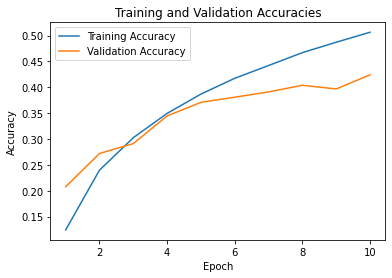

In [ ]:
#plot the train and test accuracies
train_ac = [0.1243, 0.2398,0.3025, 0.3495, 0.3868, 0.4173, 0.4420, 0.4669, 0.4870,0.5063]
val_ac = [0.2078, 0.2720, 0.2911, 0.3446, 0.3708, 0.3808, 0.3910, 0.4038, 0.3967, 0.4240 ]
epoch = [1,2,3,4,5,6,7,8,9,10]
plt.plot(epoch, train_ac, label='Training Accuracy')
plt.plot(epoch, val_ac, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

#3. Experiment with different hyperparameters for Y-network

In [ ]:
# the model described in one function
def create_cnn_model(num_filters):
    input_tensor = Input(shape=(32,32,3))

    # Left CNN model
    left_conv1 = Conv2D(num_filters, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(input_tensor)
    left_dropout1 = Dropout(0.25)(left_conv1)
    left_maxpool1 = MaxPool2D(pool_size=(2,2))(left_dropout1)

    left_conv2 = Conv2D(num_filters, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(left_maxpool1)
    left_dropout2 = Dropout(0.25)(left_conv2)
    left_maxpool2 = MaxPool2D(pool_size=(2,2))(left_dropout2)

    left_conv3 = Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(left_maxpool2)
    left_dropout3 = Dropout(0.25)(left_conv3)
    left_maxpool3 = MaxPool2D(pool_size=(2,2))(left_dropout3)
    left_flatten = Flatten()(left_maxpool3)
    left_model = Model(inputs=input_tensor, outputs=left_flatten)

    # Right CNN model
    right_conv1 = Conv2D(num_filters, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(input_tensor)
    right_dropout1 = Dropout(0.25)(right_conv1)
    right_maxpool1 = MaxPool2D(pool_size=(2,2))(right_dropout1)

    right_conv2 = Conv2D(num_filters, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(right_maxpool1)
    right_dropout2 = Dropout(0.25)(right_conv2)
    right_maxpool2 = MaxPool2D(pool_size=(2,2))(right_dropout2)

    right_conv3 = Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(right_maxpool2)
    right_dropout3 = Dropout(0.25)(right_conv3)
    right_maxpool3 = MaxPool2D(pool_size=(2,2))(right_dropout3)
    right_flatten = Flatten()(right_maxpool3)
    right_model = Model(inputs=input_tensor, outputs=right_flatten)

    # Concatenate left and right models
    concat = concatenate([left_flatten, right_flatten])

    # Output layer
    output_layer = Dense(100, activation='softmax')(concat)

    # Y network model
    y_model = Model(inputs=input_tensor, outputs=output_layer)

    # Compile the model
    y_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return y_model

In [ ]:
model = create_cnn_model(num_filters = 32)
model.fit(trainX, trainy, batch_size=100, epochs=10, validation_data=(testX, testy))

Epoch 1/10
500/500 [==============================] - 199s 394ms/step - loss: 3.7578 - accuracy: 0.1338 - val_loss: 3.5479 - val_accuracy: 0.2205
Epoch 2/10
500/500 [==============================] - 211s 423ms/step - loss: 3.0377 - accuracy: 0.2635 - val_loss: 3.2154 - val_accuracy: 0.2933
Epoch 3/10
500/500 [==============================] - 188s 376ms/step - loss: 2.7505 - accuracy: 0.3181 - val_loss: 3.0563 - val_accuracy: 0.3253
Epoch 4/10
500/500 [==============================] - 174s 348ms/step - loss: 2.5524 - accuracy: 0.3602 - val_loss: 2.9205 - val_accuracy: 0.3520
Epoch 5/10
500/500 [==============================] - 172s 345ms/step - loss: 2.4046 - accuracy: 0.3890 - val_loss: 2.8238 - val_accuracy: 0.3678
Epoch 6/10
500/500 [==============================] - 172s 344ms/step - loss: 2.2780 - accuracy: 0.4200 - val_loss: 2.6979 - val_accuracy: 0.3836
Epoch 7/10
500/500 [==============================] - 177s 354ms/step - loss: 2.1770 - accuracy: 0.4401 - val_loss: 2.6842 -

#4.Visualize Feature maps

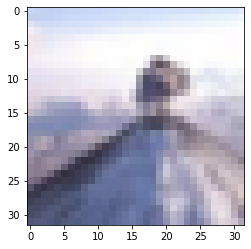

In [ ]:
# feature map visualization

#show first picture in test dataset
import matplotlib.pyplot as plt
testX[0].shape
plt.imshow(testX[0])
#frog image

In [ ]:
#shape(32,32,3) is expanded to (1,32,32,3)
img_array = np.expand_dims(testX[0], axis=0)
# output of the first convolutional layer(left branch)
new_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
new_model.summary()

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 66ms/step


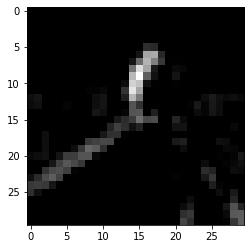

In [ ]:
#visualize the first filter
feature_maps = new_model.predict(img_array)


plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

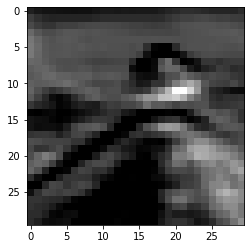

In [ ]:
#visualize the third filter

plt.imshow(feature_maps[0, :, :, 3], cmap='gray')
plt.show()

In [ ]:
# output of the first convolutional layer(right branch)

new_model = Model(inputs=model.inputs, outputs=model.layers[2].output)

new_model.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 46ms/step


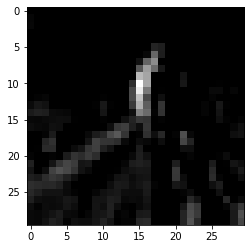

In [ ]:
#visualize the first filter

feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

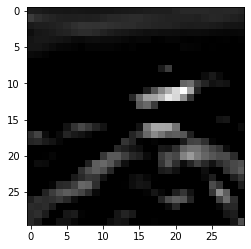

In [ ]:
#visualize the tenth filter

plt.imshow(feature_maps[0, :, :, 10], cmap='gray')
plt.show()

In [ ]:
# output of the first maxpooling layer(left branch)

new_model = Model(inputs=model.inputs, outputs=model.layers[5].output)

new_model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_48 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 93ms/step


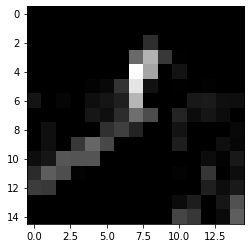

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
#output of the second convolutional layer(left branch)
new_model = Model(inputs=model.inputs, outputs=model.layers[7].output)

new_model.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_48 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
______________________________________________________

1/1 [==============================] - 0s 76ms/step


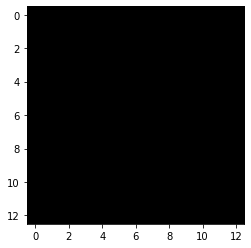

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

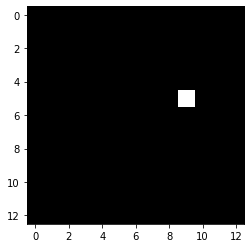

In [ ]:
plt.imshow(feature_maps[0, :, :, 5], cmap='gray')
plt.show()

In [ ]:
new_model = Model(inputs=model.inputs, outputs=model.layers[8].output)

new_model.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_51 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
______________________________________________________

1/1 [==============================] - 0s 68ms/step


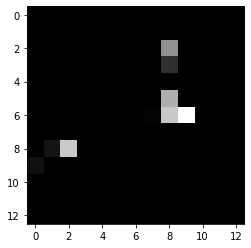

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
new_model = Model(inputs=model.inputs, outputs=model.layers[13].output)

new_model.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_48 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 dropout_49 (Dropout)        (None, 13, 13, 32)        0         
                                                          

1/1 [==============================] - 0s 75ms/step


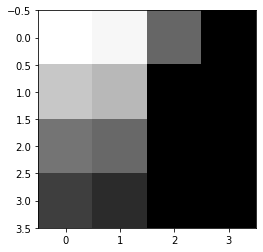

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
new_model = Model(inputs=model.inputs, outputs=model.layers[14].output)

new_model.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_51 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 dropout_52 (Dropout)        (None, 13, 13, 32)        0         
                                                          

1/1 [==============================] - 0s 104ms/step


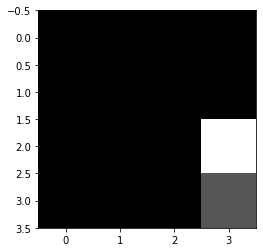

In [ ]:
feature_maps = new_model.predict(img_array)
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()